In [1]:
import altair as alt
import numpy as np
import pandas as pd
import pickle

In [2]:
def results_dataframe(systems, fnames):
    frames = []
    for sys, fname in zip(systems, fnames):
        with open(fname, 'rb') as fp:
            scaling_dict = pickle.load(fp)

        df = pd.DataFrame(scaling_dict)
        df['system'] = sys
        frames.append(df)

    results = pd.concat(frames)
    results['max_job_time'] = results['max_job_time'] / np.timedelta64(1,'s')
    return results

In [3]:
sys_names = [
    'pywren',
    'cloudknot (default)',
    'cloudknot (custom)',
]

nargs_fnames = [
    'pywren_nargs_scaling.pkl',
    'cloudknot_nargs_scaling_default_params.pkl',
    'cloudknot_nargs_scaling.pkl',
]

syssize_fnames = [
    'pywren_syssize_scaling.pkl',
    'cloudknot_syssize_scaling_default_params.pkl',
    'cloudknot_syssize_scaling.pkl',
]

nargs_scaling_results = results_dataframe(sys_names, nargs_fnames)
syssize_scaling_results = results_dataframe(sys_names, syssize_fnames)

In [4]:
nargs_scaling_results

,max_job_time,npoints,system
0,2.291,2,pywren
1,16.520,4,pywren
2,17.443,8,pywren
3,22.162,16,pywren
4,19.345,32,pywren
5,20.482,64,pywren
6,22.035,128,pywren
7,22.102,256,pywren
8,14.131,512,pywren
9,26.163,1024,pywren


In [5]:
syssize_scaling_results

,max_job_time,side_len,system
0,2.337,10,pywren
1,2.545,25,pywren
2,12.680,50,pywren
3,126.445,100,pywren
4,270.665,125,pywren
0,151.120,10,cloudknot (default)
1,53.268,25,cloudknot (default)
2,26.474,50,cloudknot (default)
3,98.540,100,cloudknot (default)
4,186.018,125,cloudknot (default)


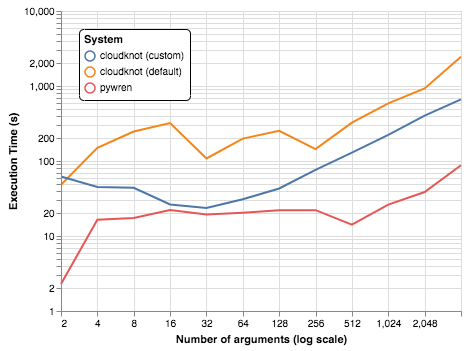

In [8]:
lines = alt.Chart(nargs_scaling_results).mark_line().encode(
    alt.X("npoints:Q", scale=alt.Scale(base=2, type="log"), axis=alt.Axis(title="Number of arguments (log scale)")),
    alt.Y('max_job_time:Q', scale=alt.Scale(base=10, type="log"), axis=alt.Axis(title='Execution Time (s)')),
    color=alt.Color("system", legend=alt.Legend(orient="top-left", title="System"))
)

lines = lines.configure_legend(fillColor='#ffffff', strokeColor='black', cornerRadius=5,
                               padding=5)

lines

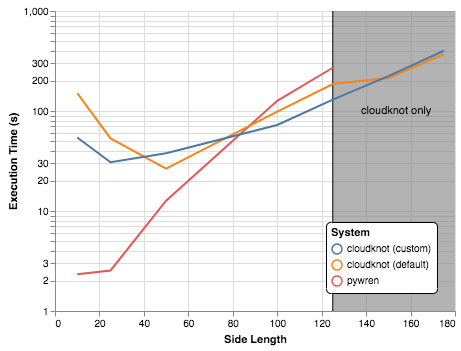

In [7]:
lines = alt.Chart(syssize_scaling_results).mark_line().encode(
    alt.X("side_len:Q", axis=alt.Axis(title='Side Length')),
    alt.Y('max_job_time:Q', scale=alt.Scale(base=10, type="log"), axis=alt.Axis(title='Execution Time (s)')),
    color=alt.Color("system", legend=alt.Legend(orient="bottom-right", title="System"))
)

data2 = pd.DataFrame([{"ThresholdValue": 125, "Threshold": "cloudknot only"}])
data3 = pd.DataFrame([{"start": 125, "end": 180,}])

rule = alt.Chart(data2).mark_rule().encode(
    x='ThresholdValue:Q'
)

text = alt.Chart(data2).mark_text(
    align='left', baseline='middle',
    dx=261, dy=10
).encode(
    alt.Y('ThresholdValue:Q'),
    text=alt.value('cloudknot only')
)

rect = alt.Chart(data3).mark_rect(color="#807f80", opacity=0.6).encode(
    x="start:Q",
    x2="end:Q",
)

chart = rect + rule + lines + text

chart = chart.configure_legend(fillColor='#ffffff', strokeColor='black', cornerRadius=5,
                               padding=5)

chart